In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Working with Classification Problems

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
print(mnist["data"].shape)
print(mnist["target"].shape)

(70000, 784)
(70000,)


## Viewing an Image

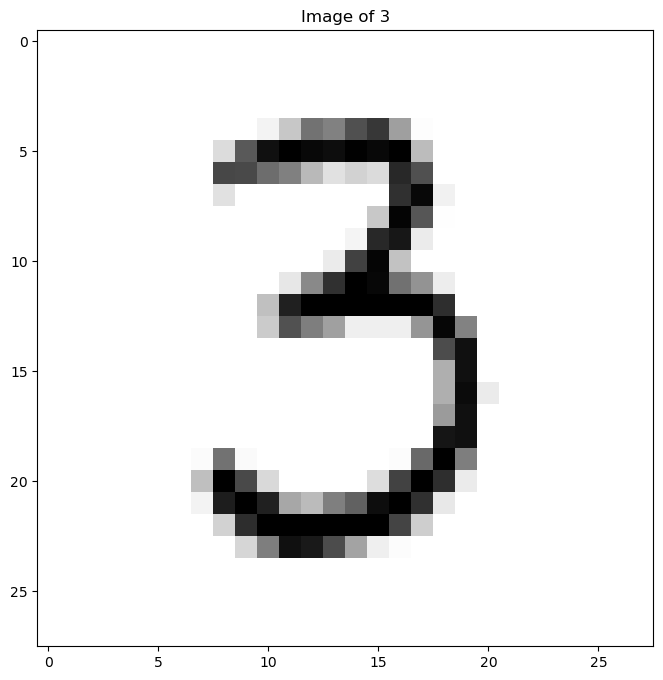

In [8]:
def plot_image(idx):
    # Accessing and Converting the Image
    img_array = mnist["data"].iloc[idx].to_numpy()
    img_array = img_array.reshape(28, 28)
    
    # Plotting the Image
    plt.figure(figsize=(8, 8))
    plt.title(f"Image of {mnist['target'].iloc[idx]}")
    plt.imshow(img_array, cmap="binary")
    
plot_image(50)

## Seperating the Train and Test Sets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], test_size=0.12, shuffle=True, random_state=17)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (61600, 784)
y_train:  (61600,)
X_test:  (8400, 784)
y_test:  (8400,)


In [15]:
# Segregating all the 7's
y_train_7 = (y_train == 7)
print(y_train_7.head())
print(y_train_7.shape)

35274    False
58149    False
58695    False
59538    False
3034     False
Name: class, dtype: bool
(61600,)


In [14]:
y_test_7 = (y_test == 7)
print(y_test_7.head())
print(y_test_7.shape)

3938     False
14210    False
28158    False
55574    False
61527    False
Name: class, dtype: bool
(8400,)


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation
rfc = RandomForestClassifier(n_jobs=-1, random_state=17)

# Training
rfc.fit(X_train, y_train_7)

RandomForestClassifier(n_jobs=-1, random_state=17)

In [19]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(
    estimator=rfc,
    X=X_test,
    y=y_test_7,
    scoring="accuracy",
    n_jobs=-1
)

print(score)

[1. 1. 1. 1. 1.]


In [22]:
# Implementing Cross-Validation Score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Initialising the KFolds
folds = StratifiedKFold(shuffle=True, random_state=17)

# Carrying out CV_Scoring
print("\nBeginning Cross Validation Score:")
i = 1
for train_idx, test_idx in folds.split(X_train, y_train_7):
    rfc_clone = clone(RandomForestClassifier())
    
    # Training fold
    X_train_fold, y_train_7_fold = X_train.iloc[train_idx], y_train_7.iloc[train_idx]
    
    # Testing fold
    X_test_fold, y_test_7_fold = X_train.iloc[test_idx], y_train_7.iloc[test_idx]
    
    # Training
    rfc_clone.fit(X_train_fold, y_train_7_fold)
    
    # Testing
    predictions = rfc_clone.predict(X_test_fold)
    correctness = sum(y_test_7_fold == predictions)
    print(f"Score for {i}th Cross Validation Split is: {correctness / len(predictions)}")
    
    i += 1


Beginning Cross Validation Score:
Score for 1th Cross Validation Split is: 1.0
Score for 2th Cross Validation Split is: 1.0
Score for 3th Cross Validation Split is: 1.0
Score for 4th Cross Validation Split is: 1.0
Score for 5th Cross Validation Split is: 1.0


## Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Testing
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train_7)

predictions = cross_val_predict(rfc, X_test, y_test_7, cv=5, n_jobs=-1)
confusion_matrix(y_test_7, predictions, labels=[True, False])

array([[   0,    0],
       [   0, 8400]])

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_7)

predictions = cross_val_predict(sgd_clf, X_test, y_test_7, n_jobs=-1)
confusion_matrix(y_test_7, predictions)

ValueError: The number of classes has to be greater than one; got 1 class

In [39]:
y_train = y_train.astype(int)
y_train.head()

35274    5
58149    3
58695    6
59538    5
3034     3
Name: class, dtype: int64

In [44]:
y_train_7 = (y_train == 7)
y_train_7 = y_train_7.astype(int)
y_train_7.head()

35274    0
58149    0
58695    0
59538    0
3034     0
Name: class, dtype: int64

In [45]:
y_train_7.tail()

37332    0
25631    0
42297    0
34959    1
64753    0
Name: class, dtype: int64

In [46]:
X_train, X_test, y_train_7, y_test_7 = train_test_split(
    X_train, y_train_7
)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (46200, 784)
y_train:  (61600,)
X_test:  (15400, 784)
y_test:  (8400,)


In [ ]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_7)

predictions = cross_val_predict(sgd_clf, X_test, y_test_7, n_jobs=-1)
confusion_matrix(y_test_7, predictions)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=17, test_size=0.12)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(61600, 784)
(61600,)
(8400, 784)
(8400,)


In [60]:
# Converting the Datatypes
y_train = y_train.astype(int)
y_train.info()

<class 'pandas.core.series.Series'>
Index: 61600 entries, 35274 to 64753
Series name: class
Non-Null Count  Dtype
--------------  -----
61600 non-null  int64
dtypes: int64(1)
memory usage: 962.5 KB


In [61]:
# Creating the binary targets
y_train_5 = (y_train == 5)
y_train_5.info()

<class 'pandas.core.series.Series'>
Index: 61600 entries, 35274 to 64753
Series name: class
Non-Null Count  Dtype
--------------  -----
61600 non-null  bool 
dtypes: bool(1)
memory usage: 541.4 KB


In [62]:
# Converting the boolean
y_train_5 = y_train_5.astype(int)
y_train_5.info()

<class 'pandas.core.series.Series'>
Index: 61600 entries, 35274 to 64753
Series name: class
Non-Null Count  Dtype
--------------  -----
61600 non-null  int64
dtypes: int64(1)
memory usage: 962.5 KB


In [63]:
y_train_5.head()

35274    1
58149    0
58695    0
59538    1
3034     0
Name: class, dtype: int64

In [64]:
y_train_5.shape

(61600,)

In [65]:
X_train.shape

(61600, 784)

In [66]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(
    X_train, y_train_5
)

In [67]:
print(X_train_5.shape)
print(y_train_5.shape)
print(X_test_5.shape)
print(y_test_5.shape)

(46200, 784)
(46200,)
(15400, 784)
(15400,)


In [69]:
sgd_clf = SGDClassifier(n_jobs=-1)
scores_5 = cross_val_score(sgd_clf, X_train_5, y_train_5, scoring="accuracy", n_jobs=-1)
print(scores_5)

[0.96818182 0.96320346 0.96774892 0.96266234 0.95595238]


In [70]:
rfc = RandomForestClassifier(n_jobs=-1)
scores_5 = cross_val_score(rfc, X_train_5, y_train_5, scoring="accuracy", n_jobs=-1)
print(scores_5)

[0.98831169 0.98625541 0.98863636 0.98582251 0.98636364]


In [72]:
predictions_sgd = cross_val_predict(sgd_clf, X_test_5, y_test_5)
n_correct = sum(y_test_5 == predictions_sgd)
print(n_correct / len(predictions_sgd))

0.9572727272727273


In [75]:
confusion_matrix(y_test_5, predictions_sgd)

array([[13737,   285],
       [  373,  1005]])

In [73]:
predictions_rfc = cross_val_predict(rfc, X_test_5, y_test_5, n_jobs=-1)
n_correct = sum(predictions_rfc == y_test_5)
print(n_correct / len(predictions_rfc))

0.9805844155844156


In [74]:
confusion_matrix(y_test_5, predictions_rfc)

array([[14009,    13],
       [  286,  1092]])

In [77]:
# Precision Score
from sklearn.metrics import precision_score, recall_score, f1_score

for _ in [predictions_rfc, predictions_sgd]:
    print("\nAccuracy of Positive Prediction: ", precision_score(y_test_5, _))
    print("Accuracy of Correct Prediction: ", recall_score(y_test_5, _))
    print("Harmonic Mean: ", f1_score(y_test_5, _))


Accuracy of Positive Prediction:  0.9882352941176471
Accuracy of Correct Prediction:  0.7924528301886793
Harmonic Mean:  0.8795811518324608

Accuracy of Positive Prediction:  0.7790697674418605
Accuracy of Correct Prediction:  0.7293178519593614
Harmonic Mean:  0.7533733133433284


ValueError: x and y must have same first dimension, but have shapes (15400,) and (8399,)

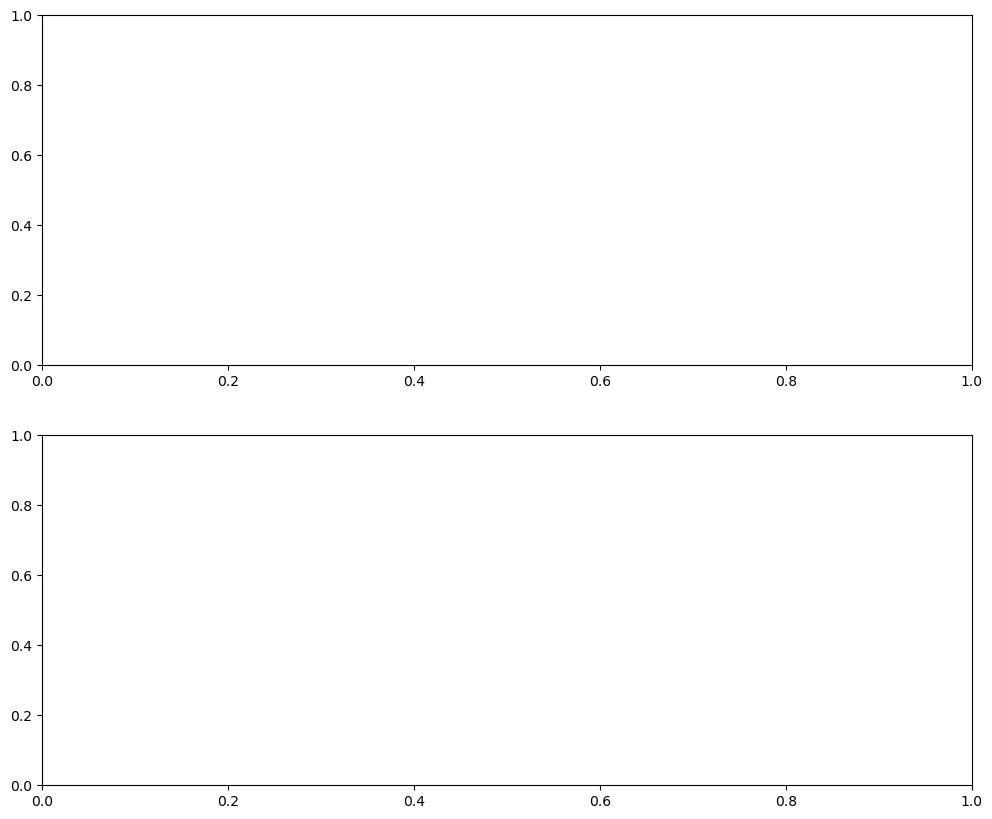

In [81]:
from sklearn.metrics import precision_recall_curve

i = 0
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
for object, name in [(SGDClassifier(), "sgd")]:
    object.fit(X_train_5, y_train_5)
    score = cross_val_predict(object, X_test_5, y_test_5, method="decision_function", n_jobs=-1) 
    precisions, recalls, threasholds = precision_recall_curve(y_test_5, score)
    
    # Plotting the Graph
    axes[i].plot(threasholds, predictions[:-1], "b--", label="Precision")
    axes[i].plot(threasholds, recalls[:-1], "g-", label="Recall")
    axes[i].vlines(threasholds, 0, 1, "k", "dotted", label="Custom Threashold")
    
    i += 1